# Mall Customer Segmentation Using K-Means Clustering

## Customer Segmentation Analysis using Machine Learning

This notebook implements K-Means clustering for mall customer segmentation using demographics, income, and spending behavior.

### Dataset Information:
- **Source**: Kaggle - https://www.kaggle.com/datasets/shwetabh123/mall-customers
- **Total Customers**: 200
- **Features**: Gender, Age, Annual Income, Spending Score
- **Gender Distribution**: 44% Male, 56% Female
- **Age Range**: 18-70 years
- **Annual Income Range**: $15k-$137k
- **Spending Score Range**: 1-99

### Analysis Goals:
1. Data preprocessing and feature scaling
2. Determine optimal number of clusters
3. Apply K-Means clustering
4. Visualize customer segments
5. Profile each cluster for business insights
6. Provide targeted marketing strategies

### Key Features:
- **Data Source**: Public dataset from Kaggle (commonly used for customer segmentation tutorials)
- **Clustering Features**: Focus on Annual Income and Spending Score for segmentation
- **Evaluation**: Within-Cluster Sum of Squares (WCSS) and silhouette score
- **Visualization**: Cluster plots, distribution analysis, and demographic profiling

### Business Applications:
- **Targeted marketing campaigns**
- **Personalized product recommendations**
- **Customer loyalty program optimization**
- **Store layout and merchandise planning**
- **Pricing strategy development**

## 1. Import Required Libraries


In [ ]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Machine learning
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("Libraries imported successfully!")


Libraries imported successfully!


## 2. Data Loading and Exploration


In [ ]:
# Load the dataset
df = pd.read_csv('Mall_Customers.csv')

# Display basic information
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nStatistical Summary:")
print(df.describe())


Dataset Shape: (200, 5)

First 5 rows:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
No

In [ ]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

# Gender distribution
print("\nGender Distribution:")
gender_counts = df['Gender'].value_counts()
print(gender_counts)
print("\nGender Percentage:")
print(df['Gender'].value_counts(normalize=True) * 100)


Missing Values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Gender Distribution:
Gender
Female    112
Male       88
Name: count, dtype: int64

Gender Percentage:
Gender
Female    56.0
Male      44.0
Name: proportion, dtype: float64


## 3. Data Preprocessing

### Encoding and Feature Scaling
- Encode Gender: Male=1, Female=2
- Scale all features using StandardScaler


In [ ]:
# Create a copy for preprocessing
df_processed = df.copy()

# Encode Gender: Male=1, Female=2
df_processed['Gender'] = df_processed['Gender'].map({'Male': 1, 'Female': 2})

print("Gender Encoding:")
print("Male = 1, Female = 2")
print("\nEncoded Gender distribution:")
print(df_processed['Gender'].value_counts().sort_index())

# Select features for clustering (excluding CustomerID)
feature_cols = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df_processed[feature_cols]

print("\nFeatures for clustering:")
print(X.head())

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nFeatures scaled successfully!")
print("Scaled data shape:", X_scaled.shape)
print("\nFirst 5 rows of scaled data:")
print(pd.DataFrame(X_scaled, columns=feature_cols).head())


Gender Encoding:
Male = 1, Female = 2

Encoded Gender distribution:
Gender
1     88
2    112
Name: count, dtype: int64

Features for clustering:
   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0       1   19                  15                      39
1       1   21                  15                      81
2       2   20                  16                       6
3       2   23                  16                      77
4       2   31                  17                      40

Features scaled successfully!
Scaled data shape: (200, 4)

First 5 rows of scaled data:
     Gender       Age  Annual Income (k$)  Spending Score (1-100)
0 -1.128152 -1.424569           -1.738999               -0.434801
1 -1.128152 -1.281035           -1.738999                1.195704
2  0.886405 -1.352802           -1.700830               -1.715913
3  0.886405 -1.137502           -1.700830                1.040418
4  0.886405 -0.563369           -1.662660               -0.395980


## 4. Determining Optimal Number of Clusters

### Elbow Method using WCSS (Within-Cluster Sum of Squares)


In [ ]:
# Calculate WCSS for different numbers of clusters
wcss = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    print(f"K={k}: WCSS={kmeans.inertia_:.2f}")

print("\nWCSS calculation completed!")


K=2: WCSS=588.80
K=3: WCSS=476.79
K=4: WCSS=388.72
K=5: WCSS=331.31
K=6: WCSS=276.41
K=7: WCSS=236.20
K=8: WCSS=199.75
K=9: WCSS=174.24
K=10: WCSS=152.03

WCSS calculation completed!


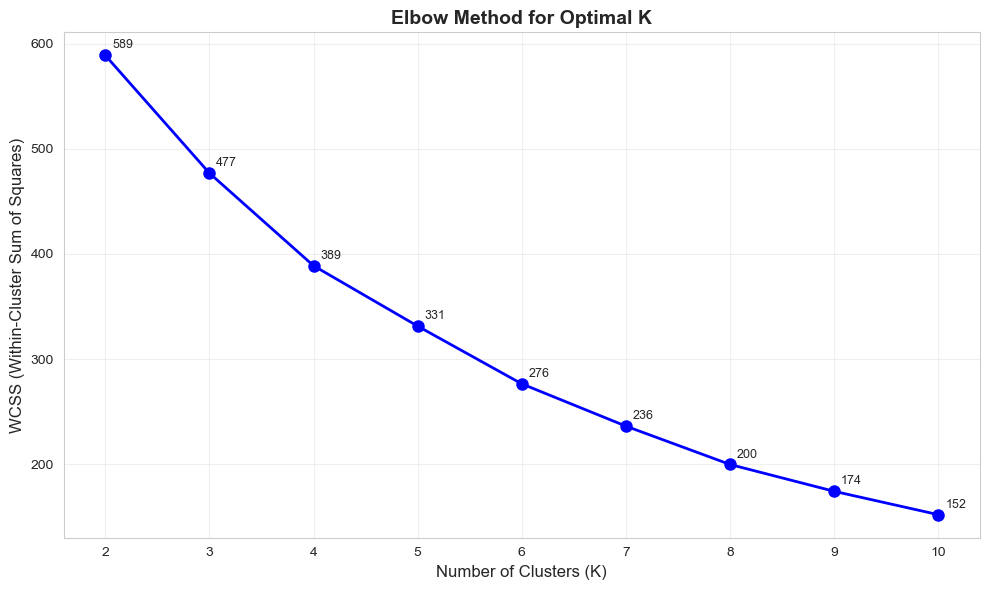

Elbow plot saved as 'elbow_method_plot.png'


In [ ]:
# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K_range, wcss, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=12)
plt.title('Elbow Method for Optimal K', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(K_range)

# Add annotations
for i, (k, w) in enumerate(zip(K_range, wcss)):
    plt.annotate(f'{w:.0f}', xy=(k, w), xytext=(5, 5),
                textcoords='offset points', fontsize=9)

plt.tight_layout()
plt.savefig('elbow_method_plot.png', dpi=300, bbox_inches='tight')
plt.show()

print("Elbow plot saved as 'elbow_method_plot.png'")


### Silhouette Analysis

Silhouette score measures how similar an object is to its own cluster compared to other clusters. Higher values indicate better-defined clusters.


In [ ]:
# Calculate silhouette scores for different K values
silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"K={k}: Silhouette Score={silhouette_avg:.4f}")

# Find optimal K based on silhouette score
optimal_k_silhouette = K_range[np.argmax(silhouette_scores)]
print(f"\nOptimal K based on Silhouette Score: {optimal_k_silhouette}")
print(f"Best Silhouette Score: {max(silhouette_scores):.4f}")


K=2: Silhouette Score=0.2518
K=3: Silhouette Score=0.2595
K=4: Silhouette Score=0.2984
K=5: Silhouette Score=0.3041
K=6: Silhouette Score=0.3311
K=7: Silhouette Score=0.3574
K=8: Silhouette Score=0.3880
K=9: Silhouette Score=0.4031
K=10: Silhouette Score=0.4208

Optimal K based on Silhouette Score: 10
Best Silhouette Score: 0.4208


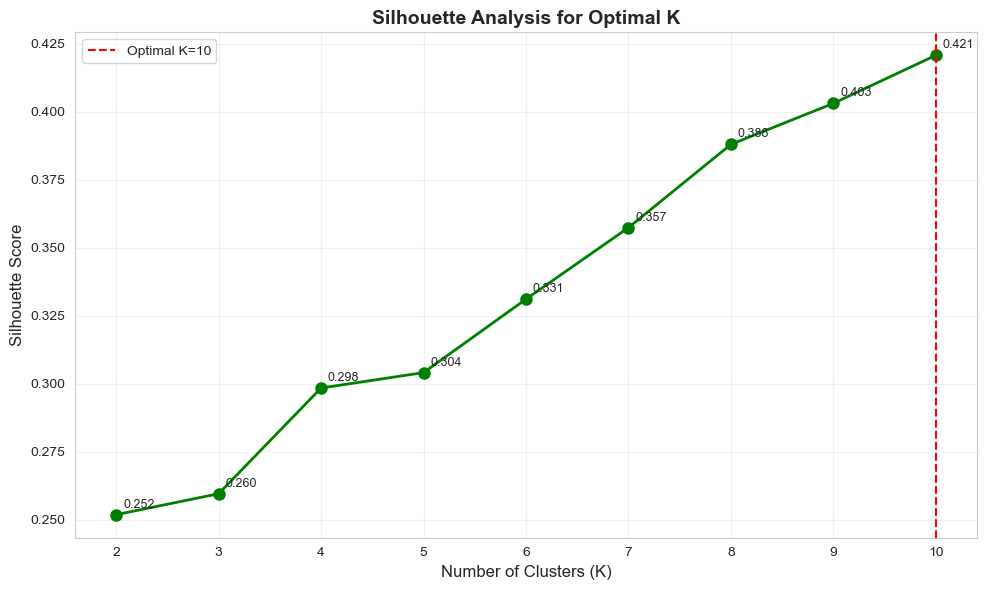

Silhouette plot saved as 'silhouette_analysis_plot.png'


In [ ]:
# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(K_range, silhouette_scores, 'go-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.title('Silhouette Analysis for Optimal K', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(K_range)

# Highlight the optimal K
plt.axvline(x=optimal_k_silhouette, color='r', linestyle='--',
           label=f'Optimal K={optimal_k_silhouette}')
plt.legend()

# Add annotations
for i, (k, s) in enumerate(zip(K_range, silhouette_scores)):
    plt.annotate(f'{s:.3f}', xy=(k, s), xytext=(5, 5),
                textcoords='offset points', fontsize=9)

plt.tight_layout()
plt.savefig('silhouette_analysis_plot.png', dpi=300, bbox_inches='tight')
plt.show()

print("Silhouette plot saved as 'silhouette_analysis_plot.png'")


### Optimal K Selection

Based on the Elbow Method and Silhouette Analysis, we'll select the optimal number of clusters. While the silhouette score peaks at K=10, the elbow curve shows diminishing returns after K=5. Choosing K=5 provides a good balance between model complexity and creating distinct, interpretable business segments.

In [ ]:
# Based on elbow method and silhouette analysis, select optimal K
# Typically, the elbow appears around K=5 for this dataset
optimal_k = 5

print(f"Selected Optimal K: {optimal_k}")
print(f"WCSS at K={optimal_k}: {wcss[optimal_k-2]:.2f}")
print(f"Silhouette Score at K={optimal_k}: {silhouette_scores[optimal_k-2]:.4f}")


Selected Optimal K: 5
WCSS at K=5: 331.31
Silhouette Score at K=5: 0.3041


## 5. K-Means Clustering with Optimal K

Applying K-Means clustering with the optimal number of clusters.


In [ ]:
# Apply K-Means with optimal K
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_processed['Cluster'] = kmeans_final.fit_predict(X_scaled)

# Add cluster labels to original dataframe as well
df['Cluster'] = df_processed['Cluster']

print(f"K-Means clustering completed with K={optimal_k}")
print(f"\nCluster distribution:")
print(df['Cluster'].value_counts().sort_index())
print("\nCluster percentages:")
print((df['Cluster'].value_counts(normalize=True) * 100).sort_index())


K-Means clustering completed with K=5

Cluster distribution:
Cluster
0    39
1    29
2    43
3    54
4    35
Name: count, dtype: int64

Cluster percentages:
Cluster
0    19.5
1    14.5
2    21.5
3    27.0
4    17.5
Name: proportion, dtype: float64


## 6. Comprehensive Visualizations


### 6.1 Annual Income vs Spending Score


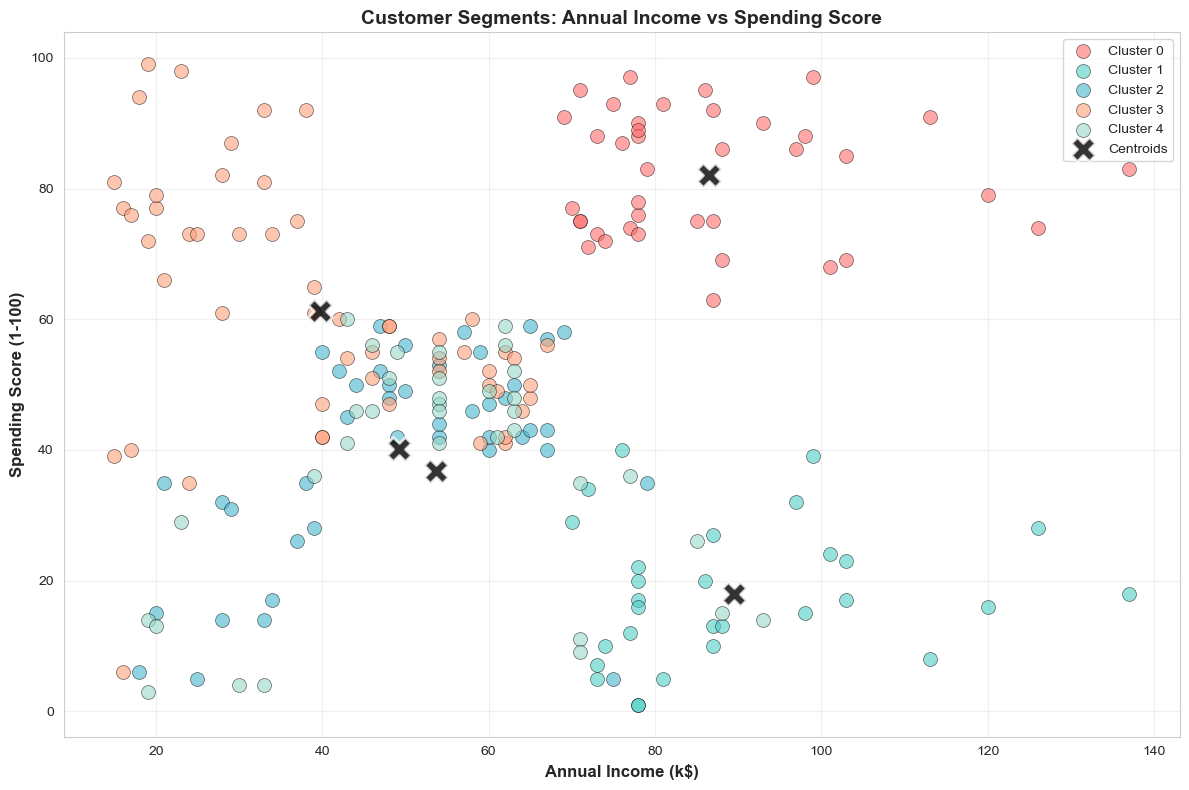

Income vs Spending plot saved as 'income_vs_spending_clusters.png'


In [ ]:
# 2D Scatter Plot: Annual Income vs Spending Score
plt.figure(figsize=(12, 8))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']

for cluster in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Annual Income (k$)'],
               cluster_data['Spending Score (1-100)'],
               c=colors[cluster], label=f'Cluster {cluster}',
               s=100, alpha=0.6, edgecolors='black', linewidth=0.5)

# Plot centroids
centroids_original = scaler.inverse_transform(kmeans_final.cluster_centers_)
plt.scatter(centroids_original[:, 2], centroids_original[:, 3],
           c='black', s=300, alpha=0.8, marker='X',
           edgecolors='white', linewidth=2, label='Centroids')

plt.xlabel('Annual Income (k$)', fontsize=12, fontweight='bold')
plt.ylabel('Spending Score (1-100)', fontsize=12, fontweight='bold')
plt.title('Customer Segments: Annual Income vs Spending Score',
         fontsize=14, fontweight='bold')
plt.legend(loc='best', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('income_vs_spending_clusters.png', dpi=300, bbox_inches='tight')
plt.show()

print("Income vs Spending plot saved as 'income_vs_spending_clusters.png'")


### 6.2 Age vs Spending Score


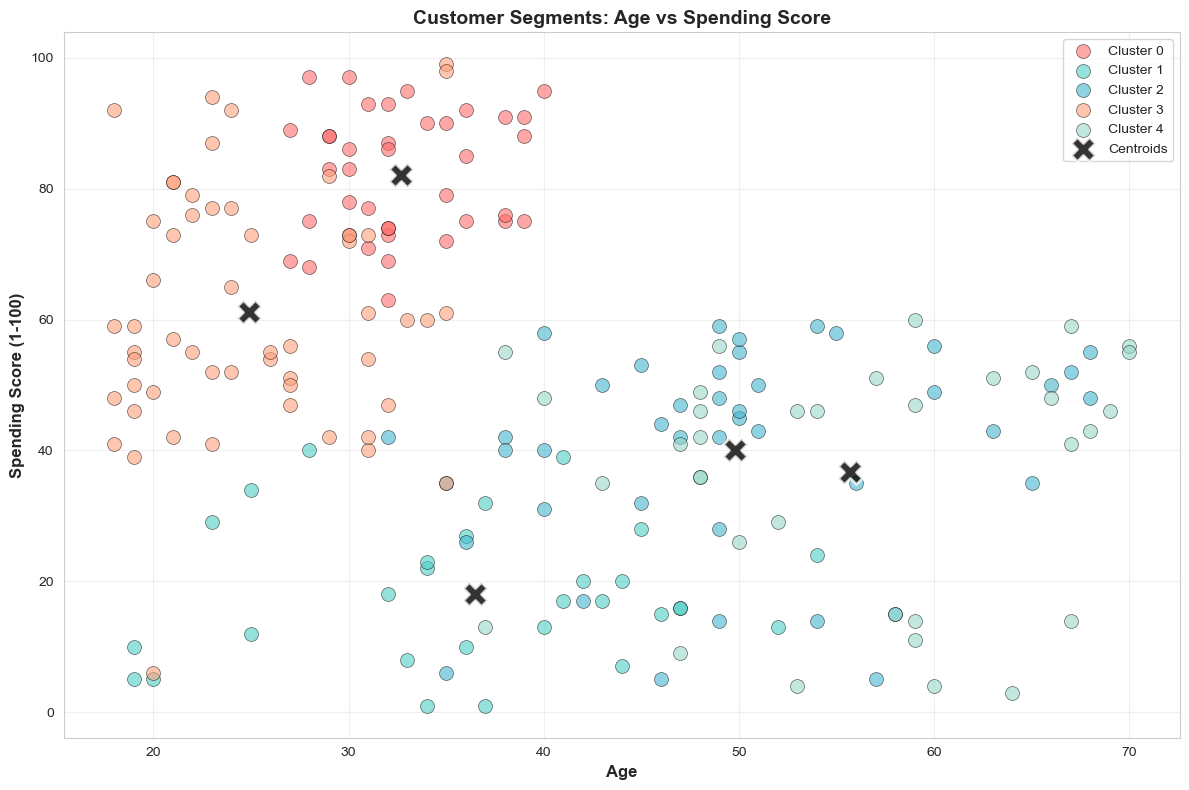

Age vs Spending plot saved as 'age_vs_spending_clusters.png'


In [ ]:
# 2D Scatter Plot: Age vs Spending Score
plt.figure(figsize=(12, 8))

for cluster in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Age'],
               cluster_data['Spending Score (1-100)'],
               c=colors[cluster], label=f'Cluster {cluster}',
               s=100, alpha=0.6, edgecolors='black', linewidth=0.5)

# Plot centroids
plt.scatter(centroids_original[:, 1], centroids_original[:, 3],
           c='black', s=300, alpha=0.8, marker='X',
           edgecolors='white', linewidth=2, label='Centroids')

plt.xlabel('Age', fontsize=12, fontweight='bold')
plt.ylabel('Spending Score (1-100)', fontsize=12, fontweight='bold')
plt.title('Customer Segments: Age vs Spending Score',
         fontsize=14, fontweight='bold')
plt.legend(loc='best', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('age_vs_spending_clusters.png', dpi=300, bbox_inches='tight')
plt.show()

print("Age vs Spending plot saved as 'age_vs_spending_clusters.png'")


### 6.3 Age vs Annual Income


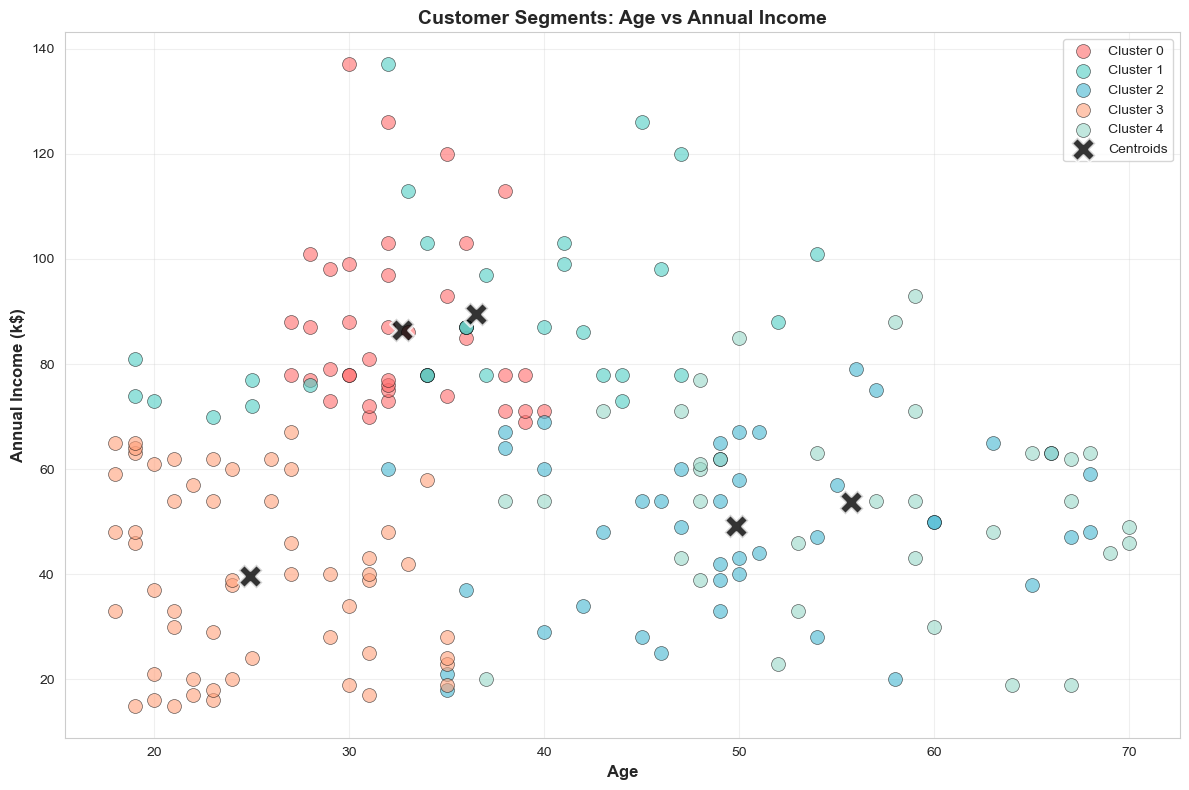

Age vs Income plot saved as 'age_vs_income_clusters.png'


In [ ]:
# 2D Scatter Plot: Age vs Annual Income
plt.figure(figsize=(12, 8))

for cluster in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Age'],
               cluster_data['Annual Income (k$)'],
               c=colors[cluster], label=f'Cluster {cluster}',
               s=100, alpha=0.6, edgecolors='black', linewidth=0.5)

# Plot centroids
plt.scatter(centroids_original[:, 1], centroids_original[:, 2],
           c='black', s=300, alpha=0.8, marker='X',
           edgecolors='white', linewidth=2, label='Centroids')

plt.xlabel('Age', fontsize=12, fontweight='bold')
plt.ylabel('Annual Income (k$)', fontsize=12, fontweight='bold')
plt.title('Customer Segments: Age vs Annual Income',
         fontsize=14, fontweight='bold')
plt.legend(loc='best', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('age_vs_income_clusters.png', dpi=300, bbox_inches='tight')
plt.show()

print("Age vs Income plot saved as 'age_vs_income_clusters.png'")


### 6.4 3D Visualization: Age × Annual Income × Spending Score


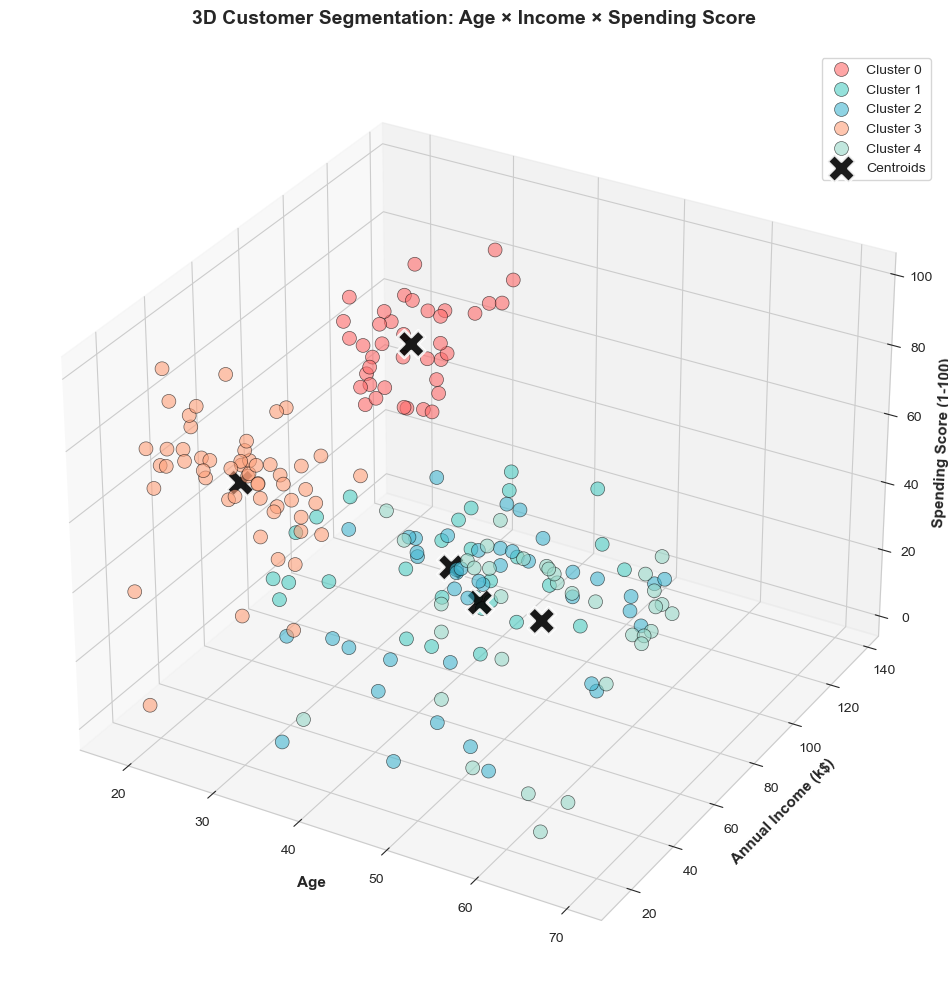

3D plot saved as '3d_cluster_visualization.png'


In [ ]:
# 3D Scatter Plot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

for cluster in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster]
    ax.scatter(cluster_data['Age'],
              cluster_data['Annual Income (k$)'],
              cluster_data['Spending Score (1-100)'],
              c=colors[cluster], label=f'Cluster {cluster}',
              s=100, alpha=0.6, edgecolors='black', linewidth=0.5)

# Plot centroids in 3D
ax.scatter(centroids_original[:, 1],
          centroids_original[:, 2],
          centroids_original[:, 3],
          c='black', s=400, alpha=0.9, marker='X',
          edgecolors='white', linewidth=2, label='Centroids')

ax.set_xlabel('Age', fontsize=11, fontweight='bold')
ax.set_ylabel('Annual Income (k$)', fontsize=11, fontweight='bold')
ax.set_zlabel('Spending Score (1-100)', fontsize=11, fontweight='bold')
ax.set_title('3D Customer Segmentation: Age × Income × Spending Score',
            fontsize=14, fontweight='bold', pad=20)
ax.legend(loc='best', fontsize=10)

plt.tight_layout()
plt.savefig('3d_cluster_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

print("3D plot saved as '3d_cluster_visualization.png'")


### 6.5 Pairplot: All Feature Relationships


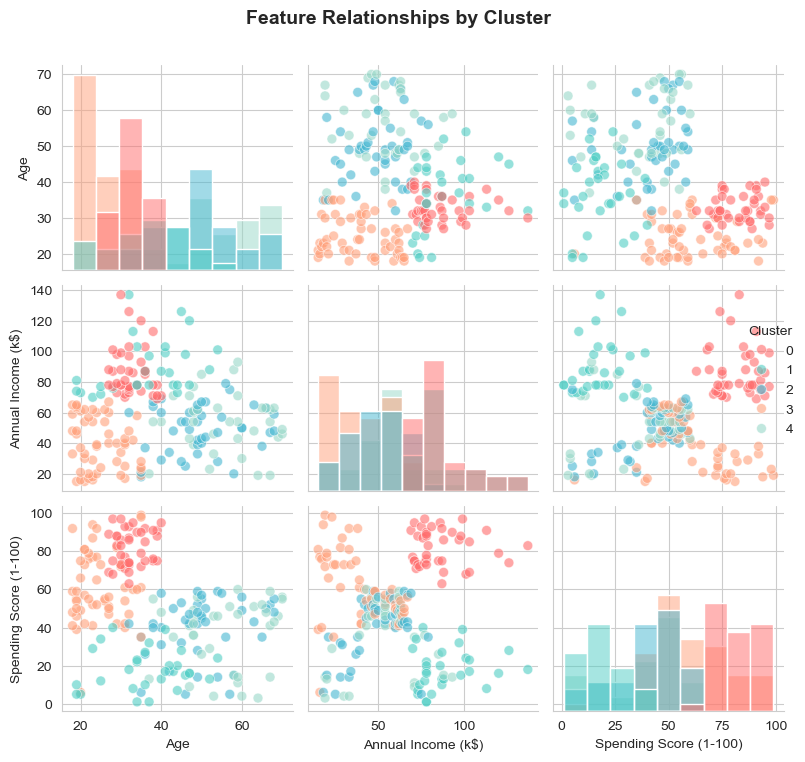

Pairplot saved as 'pairplot_clusters.png'


In [ ]:
# Create pairplot with cluster coloring
plot_df = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']].copy()
plot_df['Gender'] = plot_df['Gender'].map({'Male': 'Male', 'Female': 'Female'})

pairplot = sns.pairplot(plot_df, hue='Cluster', palette=colors[:optimal_k],
                       diag_kind='hist', corner=False, plot_kws={'alpha': 0.6, 's': 50})
pairplot.fig.suptitle('Feature Relationships by Cluster', y=1.01, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('pairplot_clusters.png', dpi=300, bbox_inches='tight')
plt.show()

print("Pairplot saved as 'pairplot_clusters.png'")


## 7. Detailed Cluster Profiling

Analyzing each cluster's characteristics for business insights.


In [ ]:
# Calculate detailed statistics for each cluster
print("="*80)
print("DETAILED CLUSTER PROFILING")
print("="*80)

for cluster in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster]

    print(f"\n{'='*80}")
    print(f"CLUSTER {cluster}")
    print(f"{'='*80}")

    # Cluster size
    size = len(cluster_data)
    percentage = (size / len(df)) * 100
    print(f"\nCluster Size: {size} customers ({percentage:.1f}% of total)")

    # Gender distribution
    gender_dist = cluster_data['Gender'].value_counts()
    print(f"\nGender Distribution:")
    for gender, count in gender_dist.items():
        pct = (count / size) * 100
        print(f"  {gender}: {count} ({pct:.1f}%)")

    # Age statistics
    print(f"\nAge Statistics:")
    print(f"  Min: {cluster_data['Age'].min():.0f} years")
    print(f"  Max: {cluster_data['Age'].max():.0f} years")
    print(f"  Mean: {cluster_data['Age'].mean():.1f} years")
    print(f"  Std Dev: {cluster_data['Age'].std():.1f} years")

    # Income statistics
    print(f"\nAnnual Income Statistics:")
    print(f"  Min: ${cluster_data['Annual Income (k$)'].min():.0f}k")
    print(f"  Max: ${cluster_data['Annual Income (k$)'].max():.0f}k")
    print(f"  Mean: ${cluster_data['Annual Income (k$)'].mean():.1f}k")
    print(f"  Std Dev: ${cluster_data['Annual Income (k$)'].std():.1f}k")

    # Spending statistics
    print(f"\nSpending Score Statistics:")
    print(f"  Min: {cluster_data['Spending Score (1-100)'].min():.0f}")
    print(f"  Max: {cluster_data['Spending Score (1-100)'].max():.0f}")
    print(f"  Mean: {cluster_data['Spending Score (1-100)'].mean():.1f}")
    print(f"  Std Dev: {cluster_data['Spending Score (1-100)'].std():.1f}")

    # Centroid values (original scale)
    print(f"\nCluster Centroid (Average Customer Profile):")
    centroid = centroids_original[cluster]
    gender_encoded = centroid[0]
    gender_label = "Male" if gender_encoded < 1.5 else "Female"
    print(f"  Gender: {gender_label} (encoded: {gender_encoded:.2f})")
    print(f"  Age: {centroid[1]:.1f} years")
    print(f"  Annual Income: ${centroid[2]:.1f}k")
    print(f"  Spending Score: {centroid[3]:.1f}")

print(f"\n{'='*80}")


DETAILED CLUSTER PROFILING

CLUSTER 0

Cluster Size: 39 customers (19.5% of total)

Gender Distribution:
  Female: 21 (53.8%)
  Male: 18 (46.2%)

Age Statistics:
  Min: 27 years
  Max: 40 years
  Mean: 32.7 years
  Std Dev: 3.7 years

Annual Income Statistics:
  Min: $69k
  Max: $137k
  Mean: $86.5k
  Std Dev: $16.3k

Spending Score Statistics:
  Min: 63
  Max: 97
  Mean: 82.1
  Std Dev: 9.4

Cluster Centroid (Average Customer Profile):
  Gender: Female (encoded: 1.54)
  Age: 32.7 years
  Annual Income: $86.5k
  Spending Score: 82.1

CLUSTER 1

Cluster Size: 29 customers (14.5% of total)

Gender Distribution:
  Female: 16 (55.2%)
  Male: 13 (44.8%)

Age Statistics:
  Min: 19 years
  Max: 54 years
  Mean: 36.5 years
  Std Dev: 9.7 years

Annual Income Statistics:
  Min: $70k
  Max: $137k
  Mean: $89.5k
  Std Dev: $17.4k

Spending Score Statistics:
  Min: 1
  Max: 40
  Mean: 18.0
  Std Dev: 10.6

Cluster Centroid (Average Customer Profile):
  Gender: Female (encoded: 1.55)
  Age: 36.5 ye

In [ ]:
# Create a summary table
cluster_summary = []

for cluster in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster]

    # Calculate metrics
    size = len(cluster_data)
    pct = (size / len(df)) * 100

    male_pct = (cluster_data['Gender'] == 'Male').sum() / size * 100
    female_pct = (cluster_data['Gender'] == 'Female').sum() / size * 100

    avg_age = cluster_data['Age'].mean()
    avg_income = cluster_data['Annual Income (k$)'].mean()
    avg_spending = cluster_data['Spending Score (1-100)'].mean()

    cluster_summary.append({
        'Cluster': cluster,
        'Size': size,
        'Percentage': f'{pct:.1f}%',
        'Male %': f'{male_pct:.1f}%',
        'Female %': f'{female_pct:.1f}%',
        'Avg Age': f'{avg_age:.1f}',
        'Avg Income': f'{avg_income:.1f}k',
        'Avg Spending': f'{avg_spending:.1f}'
    })

summary_df = pd.DataFrame(cluster_summary)
print("\nCLUSTER SUMMARY TABLE")
print("="*100)
print(summary_df.to_string(index=False))
print("="*100)



CLUSTER SUMMARY TABLE
 Cluster  Size Percentage Male % Female % Avg Age Avg Income Avg Spending
       0    39      19.5%  46.2%    53.8%    32.7      86.5k         82.1
       1    29      14.5%  44.8%    55.2%    36.5      89.5k         18.0
       2    43      21.5%   0.0%   100.0%    49.8      49.2k         40.1
       3    54      27.0%  40.7%    59.3%    24.9      39.7k         61.2
       4    35      17.5% 100.0%     0.0%    55.7      53.7k         36.8


## 8. Business Intelligence & Marketing Strategies

Based on cluster analysis, we provide descriptive names and targeted marketing strategies for each customer segment.


In [ ]:
# Analyze clusters and provide business insights
business_insights = {}

# Let's analyze each cluster based on their characteristics
for cluster in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster]

    avg_income = cluster_data['Annual Income (k$)'].mean()
    avg_spending = cluster_data['Spending Score (1-100)'].mean()
    avg_age = cluster_data['Age'].mean()

    # Determine cluster characteristics
    if avg_income > 60 and avg_spending > 60:
        name = "High Value Customers"
        desc = "Affluent customers with high spending behavior"
        strategy = [
            "Premium product offerings and exclusive services",
            "VIP loyalty programs with exclusive benefits",
            "Personalized shopping experiences and concierge services",
            "Early access to new product launches",
            "Premium credit card offers with enhanced rewards"
        ]
    elif avg_income > 60 and avg_spending < 40:
        name = "Conservative High Earners"
        desc = "High income but low spending - potential growth segment"
        strategy = [
            "Value proposition messaging and savings incentives",
            "Investment product offerings (savings accounts, bonds)",
            "Quality-focused marketing emphasizing long-term value",
            "Educational content on smart spending and quality products",
            "Targeted promotions on high-ticket items with financing options"
        ]
    elif avg_income < 40 and avg_spending > 60:
        name = "Aspirational Spenders"
        desc = "Lower income but high spending - price-sensitive segment"
        strategy = [
            "Installment payment plans and easy financing options",
            "Flash sales and limited-time promotional offers",
            "Budget-friendly product lines with good quality",
            "Loyalty rewards for frequent purchases",
            "Credit building programs and starter credit cards"
        ]
    elif avg_income < 40 and avg_spending < 40:
        name = "Budget Shoppers"
        desc = "Lower income and conservative spending"
        strategy = [
            "Discount offers and clearance sales",
            "Value bundles and combo offers",
            "Email campaigns for special promotions",
            "Essential products at competitive prices",
            "Referral programs with cash incentives"
        ]
    elif avg_age > 50:
        name = "Senior Savers"
        desc = "Older customers with moderate income and careful spending habits"
        strategy = [
            "Quality-focused marketing emphasizing long-term value",
            "Loyalty rewards for repeat, smaller purchases",
            "Promotions on goods and services relevant to their lifestyle",
            "Clear, simple messaging about product benefits",
            "In-store assistance and excellent customer service"
        ]
    else:
        name = "Mid-Life Moderates"
        desc = "Middle-aged customers with average income and spending"
        strategy = [
            "Balanced product mix of value and quality",
            "Seasonal promotions and loyalty programs",
            "Cross-selling and upselling opportunities based on past purchases",
            "Family-oriented deals and bundles",
            "Targeted email campaigns with personalized offers"
        ]

    business_insights[cluster] = {
        'name': name,
        'description': desc,
        'avg_income': avg_income,
        'avg_spending': avg_spending,
        'avg_age': avg_age,
        'size': len(cluster_data),
        'strategies': strategy
    }

# Display insights
print("="*100)
print("BUSINESS INTELLIGENCE & CUSTOMER SEGMENT PROFILES")
print("="*100)

for cluster in range(optimal_k):
    insights = business_insights[cluster]
    print(f"\n{'='*100}")
    print(f"CLUSTER {cluster}: {insights['name'].upper()}")
    print(f"{'='*100}")
    print(f"\nDescription: {insights['description']}")
    print(f"\nSegment Size: {insights['size']} customers ({insights['size']/len(df)*100:.1f}% of total)")
    print(f"\nKey Metrics:")
    print(f"  • Average Age: {insights['avg_age']:.1f} years")
    print(f"  • Average Income: ${insights['avg_income']:.1f}k")
    print(f"  • Average Spending Score: {insights['avg_spending']:.1f}")
    print(f"\nRecommended Marketing Strategies:")
    for i, strategy in enumerate(insights['strategies'], 1):
        print(f"  {i}. {strategy}")

print(f"\n{'='*100}")


BUSINESS INTELLIGENCE & CUSTOMER SEGMENT PROFILES

CLUSTER 0: HIGH VALUE CUSTOMERS

Description: Affluent customers with high spending behavior

Segment Size: 39 customers (19.5% of total)

Key Metrics:
  • Average Age: 32.7 years
  • Average Income: $86.5k
  • Average Spending Score: 82.1

Recommended Marketing Strategies:
  1. Premium product offerings and exclusive services
  2. VIP loyalty programs with exclusive benefits
  3. Personalized shopping experiences and concierge services
  4. Early access to new product launches
  5. Premium credit card offers with enhanced rewards

CLUSTER 1: CONSERVATIVE HIGH EARNERS

Description: High income but low spending - potential growth segment

Segment Size: 29 customers (14.5% of total)

Key Metrics:
  • Average Age: 36.5 years
  • Average Income: $89.5k
  • Average Spending Score: 18.0

Recommended Marketing Strategies:
  1. Value proposition messaging and savings incentives
  2. Investment product offerings (savings accounts, bonds)
  3. Q

### High-Value Customer Identification


In [ ]:
# Identify high-value customers (high income AND high spending)
df['Value_Score'] = (df['Annual Income (k$)'] / df['Annual Income (k$)'].max() +
                     df['Spending Score (1-100)'] / 100) / 2

high_value_threshold = df['Value_Score'].quantile(0.75)
df['Is_High_Value'] = df['Value_Score'] >= high_value_threshold

high_value_count = df['Is_High_Value'].sum()
high_value_pct = (high_value_count / len(df)) * 100

print(f"High-Value Customers Identified: {high_value_count} ({high_value_pct:.1f}% of total)")
print(f"\nHigh-Value Customer Distribution by Cluster:")
print(df[df['Is_High_Value']]['Cluster'].value_counts().sort_index())

# Display top 10 high-value customers
print(f"\nTop 10 High-Value Customers:")
top_customers = df.nlargest(10, 'Value_Score')[['CustomerID', 'Gender', 'Age',
                                                  'Annual Income (k$)', 'Spending Score (1-100)',
                                                  'Cluster', 'Value_Score']]
print(top_customers.to_string(index=False))


High-Value Customers Identified: 50 (25.0% of total)

High-Value Customer Distribution by Cluster:
Cluster
0    39
1     3
2     2
3     6
Name: count, dtype: int64

Top 10 High-Value Customers:
 CustomerID Gender  Age  Annual Income (k$)  Spending Score (1-100)  Cluster  Value_Score
        200   Male   30                 137                      83        0     0.915000
        194 Female   38                 113                      91        0     0.867409
        186   Male   30                  99                      97        0     0.846314
        196 Female   35                 120                      79        0     0.832956
        198   Male   32                 126                      74        0     0.829854
        190 Female   36                 103                      85        0     0.800912
        184 Female   29                  98                      88        0     0.797664
        180   Male   35                  93                      90        0     0.78

### Actionable Business Insights


In [ ]:
# Provide actionable insights
print("="*100)
print("KEY ACTIONABLE INSIGHTS")
print("="*100)

print(f"\n1. CUSTOMER BASE COMPOSITION:")
print(f"   • Total Customers Analyzed: {len(df)}")
print(f"   • Number of Distinct Segments: {optimal_k}")
print(f"   • Gender Split: {(df['Gender']=='Male').sum()} Male ({(df['Gender']=='Male').sum()/len(df)*100:.1f}%), "
      f"{(df['Gender']=='Female').sum()} Female ({(df['Gender']=='Female').sum()/len(df)*100:.1f}%)")

print(f"\n2. HIGH-VALUE SEGMENT OPPORTUNITIES:")
high_income_high_spending = df[(df['Annual Income (k$)'] > 60) & (df['Spending Score (1-100)'] > 60)]
print(f"   • {len(high_income_high_spending)} customers ({len(high_income_high_spending)/len(df)*100:.1f}%) are high income + high spending")
print(f"   • These customers generate significant revenue and should receive premium service")

print(f"\n3. GROWTH OPPORTUNITIES:")
high_income_low_spending = df[(df['Annual Income (k$)'] > 60) & (df['Spending Score (1-100)'] < 40)]
print(f"   • {len(high_income_low_spending)} customers ({len(high_income_low_spending)/len(df)*100:.1f}%) have high income but low spending")
print(f"   • Potential to increase engagement through targeted campaigns")

print(f"\n4. RETENTION FOCUS:")
low_income_high_spending = df[(df['Annual Income (k$)'] < 40) & (df['Spending Score (1-100)'] > 60)]
print(f"   • {len(low_income_high_spending)} customers ({len(low_income_high_spending)/len(df)*100:.1f}%) are loyal despite lower income")
print(f"   • Risk of churn if not provided value - focus on retention programs")

print(f"\n5. AGE-BASED INSIGHTS:")
young_customers = df[df['Age'] < 30]
middle_customers = df[(df['Age'] >= 30) & (df['Age'] < 50)]
senior_customers = df[df['Age'] >= 50]
print(f"   • Young (<30): {len(young_customers)} customers ({len(young_customers)/len(df)*100:.1f}%) "
      f"- Avg Spending: {young_customers['Spending Score (1-100)'].mean():.1f}")
print(f"   • Middle (30-49): {len(middle_customers)} customers ({len(middle_customers)/len(df)*100:.1f}%) "
      f"- Avg Spending: {middle_customers['Spending Score (1-100)'].mean():.1f}")
print(f"   • Senior (50+): {len(senior_customers)} customers ({len(senior_customers)/len(df)*100:.1f}%) "
      f"- Avg Spending: {senior_customers['Spending Score (1-100)'].mean():.1f}")

print("\n" + "="*100)


KEY ACTIONABLE INSIGHTS

1. CUSTOMER BASE COMPOSITION:
   • Total Customers Analyzed: 200
   • Number of Distinct Segments: 5
   • Gender Split: 88 Male (44.0%), 112 Female (56.0%)

2. HIGH-VALUE SEGMENT OPPORTUNITIES:
   • 39 customers (19.5%) are high income + high spending
   • These customers generate significant revenue and should receive premium service

3. GROWTH OPPORTUNITIES:
   • 37 customers (18.5%) have high income but low spending
   • Potential to increase engagement through targeted campaigns

4. RETENTION FOCUS:
   • 23 customers (11.5%) are loyal despite lower income
   • Risk of churn if not provided value - focus on retention programs

5. AGE-BASED INSIGHTS:
   • Young (<30): 55 customers (27.5%) - Avg Spending: 58.6
   • Middle (30-49): 100 customers (50.0%) - Avg Spending: 50.9
   • Senior (50+): 45 customers (22.5%) - Avg Spending: 38.4



### Customer Segment Summary Table


In [ ]:
# Create comprehensive segment summary
segment_summary = []

for cluster in range(optimal_k):
    insights = business_insights[cluster]
    cluster_data = df[df['Cluster'] == cluster]

    segment_summary.append({
        'Cluster': cluster,
        'Segment Name': insights['name'],
        'Size': insights['size'],
        '% of Total': f"{insights['size']/len(df)*100:.1f}%",
        'Avg Age': f"{insights['avg_age']:.1f}",
        'Avg Income': f"${insights['avg_income']:.0f}k",
        'Avg Spending': f"{insights['avg_spending']:.0f}",
        'Priority': 'High' if insights['avg_income'] > 60 and insights['avg_spending'] > 60
                   else 'Medium' if insights['avg_income'] > 40 or insights['avg_spending'] > 40
                   else 'Standard'
    })

segment_df = pd.DataFrame(segment_summary)
print("\nCUSTOMER SEGMENT SUMMARY")
print("="*120)
print(segment_df.to_string(index=False))
print("="*120)

# Save summary to CSV
segment_df.to_csv('customer_segment_summary.csv', index=False)
print("\nSegment summary saved to 'customer_segment_summary.csv'")



CUSTOMER SEGMENT SUMMARY
 Cluster              Segment Name  Size % of Total Avg Age Avg Income Avg Spending Priority
       0      High Value Customers    39      19.5%    32.7       $87k           82     High
       1 Conservative High Earners    29      14.5%    36.5       $90k           18   Medium
       2        Mid-Life Moderates    43      21.5%    49.8       $49k           40   Medium
       3     Aspirational Spenders    54      27.0%    24.9       $40k           61   Medium
       4             Senior Savers    35      17.5%    55.7       $54k           37   Medium

Segment summary saved to 'customer_segment_summary.csv'


## 9. Conclusions and Recommendations

### Key Findings:

1. **Customer Segmentation Success**: Successfully identified distinct customer segments using K-Means clustering with optimal K value.

2. **Diverse Customer Base**: The mall serves customers across various income levels and spending behaviors, requiring differentiated marketing approaches.

3. **High-Value Opportunities**: A significant portion of customers show high spending potential, representing key revenue drivers.

4. **Growth Potential**: Customers with high income but lower spending present opportunities for engagement and revenue growth.

### Strategic Recommendations:

1. **Personalized Marketing**: Develop segment-specific marketing campaigns tailored to each cluster's characteristics and preferences.

2. **Loyalty Programs**: Design tiered loyalty programs that reward high-value customers while encouraging increased spending from other segments.

3. **Product Mix Optimization**: Align product offerings with the income and spending patterns of each segment.

4. **Customer Experience**: Provide differentiated customer experiences based on segment value and preferences.

5. **Retention Focus**: Implement retention strategies for loyal customers, especially those with lower incomes who show high spending behavior.

6. **Data-Driven Decisions**: Continue monitoring customer behavior and update segments periodically to reflect changing patterns.

### Next Steps:

1. Implement recommended marketing strategies for each segment
2. Monitor campaign performance and ROI by segment
3. Conduct A/B testing on different approaches within segments
4. Regular re-clustering to identify segment evolution
5. Integrate findings with CRM systems for personalized customer interactions


## 10. Save Results


In [ ]:
# Save the clustered data
df.to_csv('customer_segments_final.csv', index=False)
print("Clustered customer data saved to 'customer_segments_final.csv'")

# Save cluster centroids
centroids_df = pd.DataFrame(centroids_original,
                           columns=['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
centroids_df['Cluster'] = range(optimal_k)
centroids_df.to_csv('cluster_centroids.csv', index=False)
print("Cluster centroids saved to 'cluster_centroids.csv'")

print("\nAnalysis completed successfully!")
print(f"\nGenerated files:")
print("  • elbow_method_plot.png")
print("  • silhouette_analysis_plot.png")
print("  • income_vs_spending_clusters.png")
print("  • age_vs_spending_clusters.png")
print("  • age_vs_income_clusters.png")
print("  • 3d_cluster_visualization.png")
print("  • pairplot_clusters.png")
print("  • customer_segments_final.csv")
print("  • customer_segment_summary.csv")
print("  • cluster_centroids.csv")


Clustered customer data saved to 'customer_segments_final.csv'
Cluster centroids saved to 'cluster_centroids.csv'

Analysis completed successfully!

Generated files:
  • elbow_method_plot.png
  • silhouette_analysis_plot.png
  • income_vs_spending_clusters.png
  • age_vs_spending_clusters.png
  • age_vs_income_clusters.png
  • 3d_cluster_visualization.png
  • pairplot_clusters.png
  • customer_segments_final.csv
  • customer_segment_summary.csv
  • cluster_centroids.csv
